Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
path="C:\\Users\\HP\\Downloads\\bank-additional-full.csv"
df=pd.read_csv(path,sep=";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#In this dataset, Our features are age,duration,campaign,pdays,previous,poutcome and the target variable is 'y'.
X=df[['age','duration','campaign','pdays','previous','poutcome']]
X[0:5]

,age,duration,campaign,pdays,previous,poutcome
0,56,261,1,999,0,nonexistent
1,57,149,1,999,0,nonexistent
2,37,226,1,999,0,nonexistent
3,40,151,1,999,0,nonexistent
4,56,307,1,999,0,nonexistent


In [9]:
#Here, feature poutcome is a categorical variable and Sklearn Decision Tree doesn't handle categorical values.So, let's convert this feature to numeric using Label Enncoder
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['poutcome']= label_encoder.fit_transform(df['poutcome']) 
df['poutcome'].unique() 



array([1, 0, 2])

In [10]:
#In this dataset, Our features are age,duration,campaign,pdays,previous,poutcome and the target variable is 'y'.
X=df[['age','duration','campaign','pdays','previous','poutcome']]
X[0:5]

,age,duration,campaign,pdays,previous,poutcome
0,56,261,1,999,0,1
1,57,149,1,999,0,1
2,37,226,1,999,0,1
3,40,151,1,999,0,1
4,56,307,1,999,0,1


In [11]:
#fill the target variable
y=df["y"]
y[0:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [12]:
df['poutcome']

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    0
Name: poutcome, Length: 41188, dtype: int32

Setting Up Decision Tree

In [13]:
from sklearn.model_selection import train_test_split
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.2,random_state=42)

Modeling

In [14]:
# Here we first create an instance of Decision Tree Classifier called yTree and specify criterion='entropy' inside it 
#so that we can see information gain of each node.
from sklearn.tree import DecisionTreeClassifier
yTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
yTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
#fit the data with training feature matrix and training response vector
yTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Prediction

In [16]:
#Prediction
predTree=yTree.predict(X_testset)

Evaluation

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
accuracy = metrics.accuracy_score(y_testset, predTree)
print("Decision Tree's Accuracy is:", accuracy)

Decision Tree's Accuracy is: 0.9079873755765963


Visualization

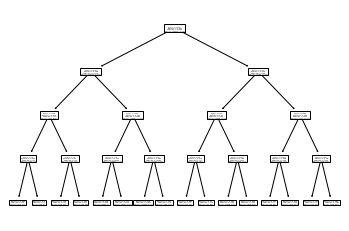

In [18]:
tree.plot_tree(yTree)
plt.show()
